# Intro to Machine Learning in Python

Learn how to get started training Neural Networks with keras


# Machine Learning Reminder
* Find f(x) such that f(x) best approximates y
* Examples:
    * Given some pixels (x) tell me the probability it’s a cat (y)
    * Given news articles (x) tell me a stocks value (y)
    * Given some sequences x find some low dimensional space (z) that represent my data 
      * f1(x)=z f2(z)=x  

# Outline
* Dense (Fully Connected Neural Networks)
  * Example Linear Fits
  * Classifications
  
# Goals

Dense Neural Netrworks are one of the building blocks used in image analysis our goals are:
* Know what a Dense Neural Network is
    * Explain What an activation function is
* Know how to write a Dense Neural Network
* How do I train a Dense Neural Network
* How do I use a trained neural network

# Packages

We're going to be working primarily with Keras and Tensorflow. They're some alternatives like PyTorch, but they all allow you to build ML models.

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Task 1: Fit a slightly harder straight line

We're going to make a data set where x is a series of 5 features, and a target value $y = 2*x_0+1$ 

$y$ is just a line with respect to $x_0$, and completely ignores $x_{1,2,3,4}$ 

In [3]:
#Build the Dataset

data_dim=5

X=np.random.uniform(0,10,size=(10000,data_dim))
def func(X):
    return 2*X[:,0]+1  # #Ignore all other input have the output only depend on the first dimention
Y=func(X)




    
    

# Our first Layer
A Dense or fully connected layer

<img src="../assets/dense.png">

A dense layer has a connection between every input variable and every output node. Each connection is represented by a weight $W_{i,n}$ from and input $X_n$ to an output $O_i$. The output is a sum over all the input variables times there weights plus a bias $B_i$
<p style="text-align: center;">
$O_i = \sum_n W_{i,n}*X_n+B_i$    
</p>

We will need to fit this to data, which means finding the best values for $W_{i,n}$ and $B_i$ to approximate our data.


In [4]:
# All models start out with an input layer
input_layer=tf.keras.layers.Input(shape=(data_dim,)) 
output_layer = tf.keras.layers.Dense(1)(input_layer)
#A keras model is class used for fitting it takes input layers and output layers
linear_model=tf.keras.models.Model(input_layer,output_layer)


In the code above we define and Input layer and one Dense (Fully Connected Layer), in our equation above
i=1 n=data_dim
if data_dim ==1
then 

$O_i = \sum_n W_{i,n}*X_n+B_i  = O_0 =  W_{0,0}*X_0+B_0$

You'll notice from last lecture this is the same form as our linear model.

* $y_{pred,i}=\theta_{1}*x_{i}+\theta_{2} $

* Each 'neuron' in a dense network is one linear model

in neural network lingo 
*  $W$ is called the weight matrix 
*  $B$ the bias
*  $W$ is a matrix and can have several parameters and all the parameters in the network are often represented by just $\theta$ 

Just as in our Linear model we are going to use the same loss function
* $L=\frac{1}{N}\sum_i (y_{pred,i}-y_{true,i})^2$
* which is Mean Squared Error or mse for short
* and we will pick an optimizer 'adam'



In [15]:


#MSE= Mean Squared Error 
linear_model.compile(loss='mse',optimizer='adam')

# Fit Our Simple Neural Network
#Fit
linear_model.fit(X,Y,epochs=10,validation_split=0.5) #Have Keras make a test/validation split for us




Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 0s 83us/step - loss: 0.4402 - val_loss: 0.4539
Epoch 2/10
5000/5000 [==============================] - 0s 23us/step - loss: 0.4412 - val_loss: 0.4518
Epoch 3/10
5000/5000 [==============================] - 0s 23us/step - loss: 0.4410 - val_loss: 0.4520
Epoch 4/10
5000/5000 [==============================] - 0s 23us/step - loss: 0.4411 - val_loss: 0.4534
Epoch 5/10
5000/5000 [==============================] - 0s 25us/step - loss: 0.4408 - val_loss: 0.4585
Epoch 6/10
5000/5000 [==============================] - 0s 24us/step - loss: 0.4427 - val_loss: 0.4541
Epoch 7/10
5000/5000 [==============================] - 0s 23us/step - loss: 0.4399 - val_loss: 0.4519
Epoch 8/10
5000/5000 [==============================] - 0s 23us/step - loss: 0.4404 - val_loss: 0.4517
Epoch 9/10
5000/5000 [==============================] - 0s 23us/step - loss: 0.4400 - val_loss: 0.4528
Epoch 10/10
5000/5000 [==

In [16]:
#Lets plot the output as a function of X_0

#Create some Random 5-d data
X_test=np.random.uniform(0,10,size=(100,data_dim))
#Set the first dimention to be a line
X_test[:,0]=np.linspace(-5,15,100)

#Get the True distribution from our test function
Y_test=func(X_test)

#Get the prediction from our model
Y_pred=linear_model.predict(X_test)




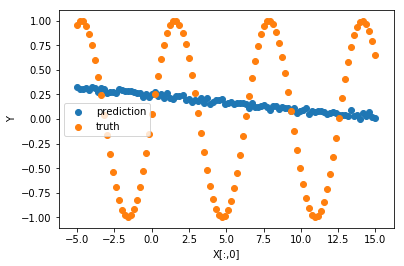

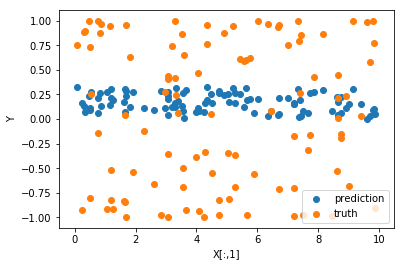

In [17]:
#Plot

plt.scatter(X_test[:,0],Y_pred,label='prediction')
plt.scatter(X_test[:,0],Y_test,label='truth')
plt.xlabel('X[:,0]')
plt.ylabel('Y')
plt.legend()
plt.show()

#Lets Look at it wrt X[:,1]
plt.scatter(X_test[:,1],Y_pred,label='prediction')
plt.scatter(X_test[:,1],Y_test,label='truth')
plt.xlabel('X[:,1]')
plt.ylabel('Y')
plt.legend()
plt.show()



We can look at a models weights

In [ ]:
weights=linear_model.get_weights()
print(len(weights))
print(weights[0].shape,weights[1].shape)

print(weights[0])

#Jake, add some English to help students distinguish? Difference between this cell and the next?

We expect $W_{0,0}$=2, and $B_0$=1

In [ ]:
print("W=",weights[0])
print("W[0,0]=",weights[0][0,0])
print("B=",weights[1])


# Try it yourself 
Run the cell below to create a similar data set, but this time with some noise

$y = 2*x_0+1+N(0,2)$ 


In [ ]:
#Build the Dataset

data_dim=5

X=np.random.uniform(0,10,size=(10000,data_dim))
def func(X):
    return 2*X[:,0]+1 + np.random.normal(0,2,size=(len(X))) #Ignore all other input have the output only depend on the first dimention
Y=func(X)



In [6]:
"""Write your Model"""
"Input"
"Dense Layer"
"Create Model"
"Fit"


'Fit'

In [7]:
"""Test"""


'Test'

In [8]:
"""Plot"""


'Plot'

Lets try something a bit more complicated a sin wave

In [9]:
X=np.random.uniform(0,10,size=(10000,data_dim))
def func(X):
    return np.sin(X[:,0]) #Ignore all other input have the output only depend on the first dimention
Y=func(X)


In [12]:

# All models start out with an input layer

input_layer=tf.keras.layers.Input(shape=(data_dim,)) 
output_layer = tf.keras.layers.Dense(1)(input_layer)
#A keras model is a way of going from one layer to the next
sine_model=tf.keras.models.Model(input_layer,output_layer)
sine_model.compile(loss='mse',optimizer='adam')
sine_model.fit(X,Y,epochs=100,validation_split=0.5) #Have Keras make a test/validation split for us





Train on 5000 samples, validate on 5000 samples
Epoch 1/100
5000/5000 [==============================] - 0s 82us/step - loss: 24.2091 - val_loss: 17.7229
Epoch 2/100
5000/5000 [==============================] - 0s 24us/step - loss: 15.2921 - val_loss: 13.5770
Epoch 3/100
5000/5000 [==============================] - 0s 23us/step - loss: 11.8260 - val_loss: 10.4443
Epoch 4/100
5000/5000 [==============================] - 0s 24us/step - loss: 8.9720 - val_loss: 7.8350
Epoch 5/100
5000/5000 [==============================] - 0s 24us/step - loss: 6.6315 - val_loss: 5.7332
Epoch 6/100
5000/5000 [==============================] - 0s 23us/step - loss: 4.7964 - val_loss: 4.1015
Epoch 7/100
5000/5000 [==============================] - 0s 24us/step - loss: 3.4063 - val_loss: 2.9044
Epoch 8/100
5000/5000 [==============================] - 0s 24us/step - loss: 2.3940 - val_loss: 2.0498
Epoch 9/100
5000/5000 [==============================] - 0s 24us/step - loss: 1.6815 - val_loss: 1.4487
Epoch 10/1

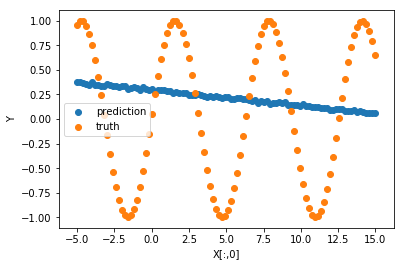

In [13]:
X_test=np.random.uniform(0,10,size=(100,data_dim))
X_test[:,0]=np.linspace(-5,15,100)
Y_test=func(X_test)
Y_pred=sine_model.predict(X_test)

plt.scatter(X_test[:,0],Y_pred,label='prediction')
plt.scatter(X_test[:,0],Y_test,label='truth')
plt.xlabel('X[:,0]')
plt.ylabel('Y')
plt.legend()


Oops this didn't work. So far what we wrote above can only be linear

<p style="text-align: center;">
$O_i = \sum_n W_{i,n}*X_n+B_i$    
</p>

we need to add something called an activation function $\sigma$

<p style="text-align: center;">
$O_i = \sigma(\sum_n W_{i,n}*X_n+B_i)$    
</p>

$\sigma$ has to be non-linear and a good choice is a LeakyReLU

<img src='../assets/leakyReLU.png'>

Let's also make our model a bit more powerful, by adding more layers $l$

<p style="text-align: center;">
$O_i,o=X_i$
</p>
 
<p style="text-align: center;">  
$O_{i,l} = \sigma(\sum_n W_{i,l,n}*O_{i,l-1}+B_{i,l})$    
</p>


In [ ]:
input_layer=tf.keras.layers.Input(shape=(data_dim,)) 
###Lets Add another layer and an Activation###
nn = tf.keras.layers.Dense(20)(input_layer)
nn = tf.keras.layers.LeakyReLU()(nn)

nn = tf.keras.layers.Dense(20)(nn)
nn = tf.keras.layers.LeakyReLU()(nn)

nn = tf.keras.layers.Dense(20)(nn)
nn = tf.keras.layers.LeakyReLU()(nn)

output_layer = tf.keras.layers.Dense(1)(nn)
#A keras model is a way of going from one layer to the next
nn_model=tf.keras.models.Model(input_layer,output_layer)
nn_model.summary()
nn_model.compile(loss='mse',optimizer='adam')

In [ ]:
nn_model.fit(X,Y,epochs=50,validation_split=0.5,callbacks=[es]) #Have Keras make a test/validation split for us


In [ ]:

X_test=np.random.uniform(0,10,size=(100,data_dim))
X_test[:,0]=np.linspace(-5,15,100)
Y_test=func(X_test)
Y_pred=nn_model.predict(X_test)

plt.scatter(X_test[:,0],Y_pred,label='prediction')
plt.scatter(X_test[:,0],Y_test,label='truth')
plt.xlabel('X[:,0]')
plt.ylabel('Y')
plt.legend()


The data fits the sin curve perfectly where it had seen training data 0-10, and not so well where there was no training data. Neural networks are universal function approximators, you have little control of what they predict when given data that is completely new. 


In [ ]:
"""Try and fix the above plot so the prediction and truth matches the whole range from -5 15"""

X=np.random.uniform(-5,15,size=(10000,data_dim))
def func(X):
    return np.sin(X[:,0]) #Ignore all other input have the output only depend on the first dimention
Y=func(X)

input_layer=tf.keras.layers.Input(shape=(data_dim,)) 
###Lets Add another layer and an Activation### Jake, do this in steps?
nn = tf.keras.layers.Dense(20)(input_layer)
nn = tf.keras.layers.LeakyReLU()(nn)

nn = tf.keras.layers.Dense(20)(nn)
nn = tf.keras.layers.LeakyReLU()(nn)

nn = tf.keras.layers.Dense(20)(nn)
nn = tf.keras.layers.LeakyReLU()(nn)

output_layer = tf.keras.layers.Dense(1)(nn)
#A keras model is a way of going from one layer to the next
nn_model=tf.keras.models.Model(input_layer,output_layer)
nn_model.summary()
nn_model.compile(loss='mse',optimizer='adam')

nn_model.fit(X,Y,epochs=50,validation_split=0.5,callbacks=[es]) #Have Keras make a test/validation split for us

X_test=np.random.uniform(-5,15,size=(100,data_dim))
X_test[:,0]=np.linspace(-5,15,100)
Y_test=func(X_test)
Y_pred=nn_model.predict(X_test)

plt.scatter(X_test[:,0],Y_pred,label='prediction')
plt.scatter(X_test[:,0],Y_test,label='truth')
plt.xlabel('X[:,0]')
plt.ylabel('Y')
plt.legend()

# Classification

Classification is problem where each of our examples (x) belongs to a class (y). Since Neural networks are universal function approximators, we can use

$P(y|x)$

How do we do that? We use a loss function that is minimized when f(x)= $P(y|x)$
When we just have 2 class (A or B/True or False) we can use binary cross-entropy

$L=-y_{true}*ln(y_{pred})-(1-y_{true})*ln(1-y_{pred})$


* if you're curious

This is essentially the negative log likelihood of a Bernoulli distribution

$P(y,p)=p^{y}(1-p)^{1-y}$

$-ln(P(y,p))=-ln(p^{y}(1-p)^{1-y})= -y*ln(p)-(1-y)*ln(1-p)$

# What it Means for our Neural Network

Be default a layer in keras has no (or linear) Activation which can take on any value from -inf - inf. In the above loss function we're trying to approximate a probability which must be between 0-1. To make this happen when have to add an activation on the output layer. We'll use a sigmoid.

$\sigma(x)=\frac{1}{1+e^{-x}}$


Lets try one last toy problem.

1. Class P(y=A|x) = N(1,1)
2. Class P(y=B|x) = N(-1,1)





In [ ]:
#Class A
n_data=10000

y_train=np.ones(n_data) #Class A =1
y_develop=np.ones(n_data)
y_test=np.ones(n_data)

x_train=np.random.normal(1,1,size=n_data)
x_develop=np.random.normal(1,1,size=n_data)
x_test=np.random.normal(1,1,size=n_data)


#Class B
y_train=np.append(y_train,np.zeros(n_data)) #Class B=0
y_develop=np.append(y_develop,np.zeros(n_data)) 
y_test=np.append(y_test,np.zeros(n_data)) 

x_train=np.append(x_train,np.random.normal(-1,1,size=n_data))
x_develop=np.append(x_develop,np.random.normal(-1,1,size=n_data))
x_test=np.append(x_test,np.random.normal(-1,1,size=n_data))




# A simple way to look at a feature is a histogram
Plot how many times does class A have a feature value within a bin


In [ ]:
#Histogram for class A
a_mask=y_train==1
plt.hist(x_train[a_mask],bins=16,range=(-4,4),histtype='step',label='Class A')

#Histogram for Class B
b_mask=y_train==0
plt.hist(x_train[b_mask],bins=16,range=(-4,4),histtype='step',label='Class B')
len(a_mask)
plt.xlabel('X')
plt.ylabel('N Examples')
plt.legend()
plt.show()

In [ ]:

input_layer=tf.keras.layers.Input(shape=(1,)) 
###Same as Before###
nn = tf.keras.layers.Dense(20)(input_layer)
nn = tf.keras.layers.LeakyReLU()(nn)

nn = tf.keras.layers.Dense(20)(nn)
nn = tf.keras.layers.LeakyReLU()(nn)

nn = tf.keras.layers.Dense(20)(nn)
nn = tf.keras.layers.LeakyReLU()(nn)
#Sigmoid!!!!
output_layer = tf.keras.layers.Dense(1,activation='sigmoid')(nn)

nn_model=tf.keras.models.Model(input_layer,output_layer)
nn_model.summary()
#Binary Cross Entropy!!!
nn_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

nn_model.fit(x_train,y_train,validation_data=(x_develop,y_develop),epochs=10,callbacks=[es])

In [ ]:
#




X_test=np.linspace(-4,4,100)
Y_true=1/(1+np.exp(-2*X_test))#Proof Left to Reader

Y_pred=nn_model.predict(X_test)
plt.scatter(X_test,Y_pred,label='prediction')
plt.scatter(X_test,Y_true,label='Truth')

plt.xlabel('X')
plt.ylabel('P(y=a|x)')
plt.legend()
plt.show() # Jake overlay histogram

# Dense network summary

* Dense networks take fixed length input and have a fixed length output
* Like All Neural Network layers they require an activation function
* They can be stacked to represent more complicated functions
* You're taking your chances when predicting data that's very different from you're training data


# A Real World Example
We're going to use a number of measured values to try and predict good wine.
Source:https://archive.ics.uci.edu/ml/datasets/Wine+Quality (Cortez et al., 2009)

* Goal: Predict whether a wine is excellent based score given to the wine by an expert panel (1-10)
    * Score > 5 Excellent
    * Score <=5 Average

* Features:
  * 1 - fixed acidity
  * 2 - volatile acidity
  * 3 - citric acid
  * 4 - residual sugar
  * 5 - chlorides
  * 6 - free sulfur dioxide
  * 7 - total sulfur dioxide
  * 8 - density
  * 9 - pH
  * 10 - sulphates
  * 11 - alcohol
  * 12 - Red/White




In [ ]:
import winedata
import importlib
importlib.reload(winedata)


wd=winedata.WineData()
print(wd.x_train.shape,wd.y_train.shape)

In [ ]:
wd.y_develop


In [ ]:
input_layer=tf.keras.layers.Input(shape=(12,)) 
###Lets Add another layer and an Activation### Jake, get rid of dropout layers?
nn = tf.keras.layers.Dense(50)(input_layer)
nn = tf.keras.layers.LeakyReLU()(nn)
nn = tf.keras.layers.Dropout(0.3)(nn)
nn = tf.keras.layers.Dense(50)(nn)
nn = tf.keras.layers.LeakyReLU()(nn)
nn = tf.keras.layers.Dropout(0.3)(nn)
nn = tf.keras.layers.Dense(50)(nn)
nn = tf.keras.layers.LeakyReLU()(nn)
nn = tf.keras.layers.Dropout(0.3)(nn)

output_layer = tf.keras.layers.Dense(1,activation='sigmoid')(nn)
#A keras model is a way of going from one layer to the next
wine_model=tf.keras.models.Model(input_layer,output_layer)
wine_model.summary()
wine_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
wine_model.fit(wd.x_train,wd.y_train,epochs=50,validation_data=(wd.x_develop,wd.y_develop),callbacks=[es]) #Have Keras make a test/validation split for us


In [ ]:
#make a prediction
pred=wine_model.predict(wd.x_develop)



In [ ]:
print(pred.shape,wd.y_develop.shape) 

plt.hist([p for i,p in zip(wd.y_develop,np.squeeze(pred)) if i],bins=50,range=(0,1),density=True,histtype='step',label="Good")
plt.hist([p for i,p in zip(wd.y_develop,np.squeeze(pred)) if not i],bins=50,range=(0,1),density=True,histtype='step',label="Bad")

plt.legend()
plt.xlabel('NN Output')
plt.show()


In [ ]:
print(pred.shape)
for n in range(12):
    good=[]
    bad=[]
    for i,v in enumerate(pred[:,0]):
        if v >.8:
            good.append(wd.x_develop[i,n])
        else:
            bad.append(wd.x_develop[i,n])
    print(len(good),len(bad))
    label=wd.header[n]
    max_range=max([max(good),max(bad)])
    min_range=min([min(good),min(bad)])
    
    plt.hist(good,density=True,histtype='step',label='good',range=(min_range,max_range),bins=20)
    plt.hist(bad,density=True,histtype='step',label='bad',range=(min_range,max_range),bins=20)
    plt.xlabel(label)
    plt.legend()
    plt.show()